# Homework 7: Analysis Notebook

*IMPRS - Using Python for Cognitive Science (2022) - Session 7*


<font color='gold'>**Introduction**</font>
- A nice introduction at the top, explaining what you did (in a Markdown cell)
- In between: text boxes in markdown describing what you are doing


In [2]:
# load required packages
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import numpy as np
import pandas as pd
import os


<font color='gold'>**Data Summary**</font>
- Read in a dataset of choice
- Make a table summarizing the data


In [3]:
# define path where dataset is stored
path = '/Users/sandra/Desktop/MPI/02_IMPRS/2022/Python/session7_stats'

# read in a dataset of my choice
participants = pd.read_csv(os.path.join(path, 'participants.csv'))
participants

# use a for-loop to go through the participant list and load the data
trials = pd.DataFrame()

for participant_id in participants['id']:
    participant_data = pd.read_csv(f'participants/{participant_id}.csv')
    trials = trials.append(participant_data)

participant_data

# merge participant and trial data
dataset = trials.merge(participants, on='id')
dataset.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)
dataset.head(-300)

### maybe save that as a new dataframe, so I don't copy and paste from the exercise 

/var/folders/5l/0s633w5d1p7f0bggq1hk0zc40000gn/T/ipykernel_28194/1833272523.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/5l/0s633w5d1p7f0bggq1hk0zc40000gn/T/ipykernel_28194/1833272523.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/5l/0s633w5d1p7f0bggq1hk0zc40000gn/T/ipykernel_28194/1833272523.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
/var/folders/5l/0s633w5d1p7f0bggq1hk0zc40000gn/T/ipykernel_28194/1833272523.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
895,55,59785,condition_a,1343.532465,Cassandra,Anderson,18,female
896,56,59785,condition_b,345.353378,Cassandra,Anderson,18,female
897,57,59785,condition_b,235.146851,Cassandra,Anderson,18,female
898,58,59785,condition_b,578.310077,Cassandra,Anderson,18,female


In [14]:
# summarize by condition
condition = dataset.groupby(by='condition').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean)
)
condition 

# reset  index
condition.reset_index(inplace=True)
condition

,condition,mean_RT,median_RT,std_RT,mean_age
0,baseline,481.484448,405.965007,283.582387,23.3
1,condition_a,759.387950,634.627644,476.263170,23.3
2,condition_b,452.634481,372.003101,301.176629,23.3


In [10]:
# summarize by gender
gender = dataset.groupby(by='sex').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean)
)
gender 

# reset  index
gender.reset_index(inplace=True)
gender

,sex,mean_RT,median_RT,std_RT,mean_age
0,female,566.867689,456.011101,398.419915,22.428571
1,male,558.983036,455.819114,367.710414,25.333333


In [17]:
sum = dataset.groupby(['sex','condition']).aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean)
)
sum 

# reset  index
sum.reset_index(inplace=True)
sum

,sex,condition,mean_RT,median_RT,std_RT,mean_age
0,female,baseline,487.022358,406.170455,289.742291,22.428571
1,female,condition_a,755.917521,615.788553,481.065448,22.428571
2,female,condition_b,457.663187,367.355259,328.244119,22.428571
3,male,baseline,468.562658,398.874173,269.395980,25.333333
4,male,condition_a,767.485619,722.390660,466.754295,25.333333
5,male,condition_b,440.900832,377.472442,226.556297,25.333333


<font color='gold'>**Plotting a Contrast**</font>
- A plot of your contrast of interest


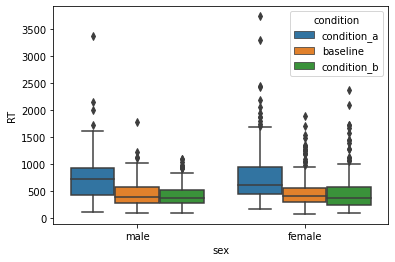

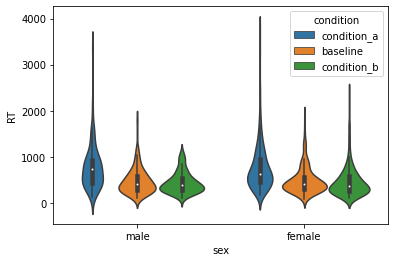

In [64]:
sns.boxplot(x='sex', y='RT', hue='condition', data=dataset)
plt.show()

sns.violinplot(x='sex', y='RT', hue='condition', data=dataset)
plt.show()



<font color='gold'>**Statistically Testing Significance**</font>
- A statistical test to determine its significance

<AxesSubplot:xlabel='RT', ylabel='Count'>

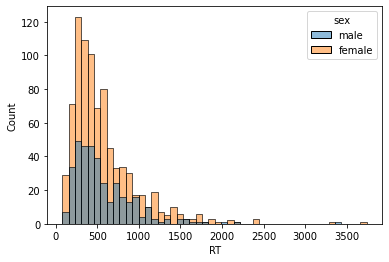

In [27]:
# check normal distribution for gender
sns.histplot(dataset, x="RT", hue="sex")


<AxesSubplot:xlabel='RT', ylabel='Count'>

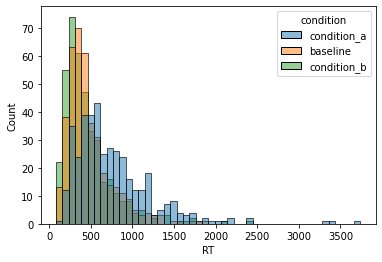

In [28]:
# check normal distribution for condition
sns.histplot(dataset, x="RT", hue="condition")


In [65]:

means = dataset.groupby(by=['sex', 'condition']).aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    std_RT=pd.NamedAgg('RT', np.std))

means.reset_index(inplace=True)
means

,sex,condition,mean_RT,std_RT
0,female,baseline,487.022358,289.742291
1,female,condition_a,755.917521,481.065448
2,female,condition_b,457.663187,328.244119
3,male,baseline,468.562658,269.395980
4,male,condition_a,767.485619,466.754295
5,male,condition_b,440.900832,226.556297


<AxesSubplot:xlabel='sex', ylabel='mean_RT'>

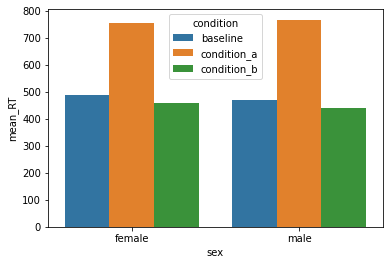

In [94]:
sns.barplot(x="sex", y="mean_RT", hue="condition", data=means)

<AxesSubplot:xlabel='mean_RT', ylabel='Count'>

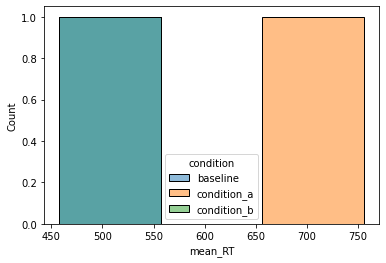

In [99]:
# subset only for female participants
means_female = means[0:3]
means_female

In [96]:
# subset only for male participants
means_male = means[3:6]
means_male


,sex,condition,mean_RT,std_RT
3,male,baseline,468.562658,269.395980
4,male,condition_a,767.485619,466.754295
5,male,condition_b,440.900832,226.556297


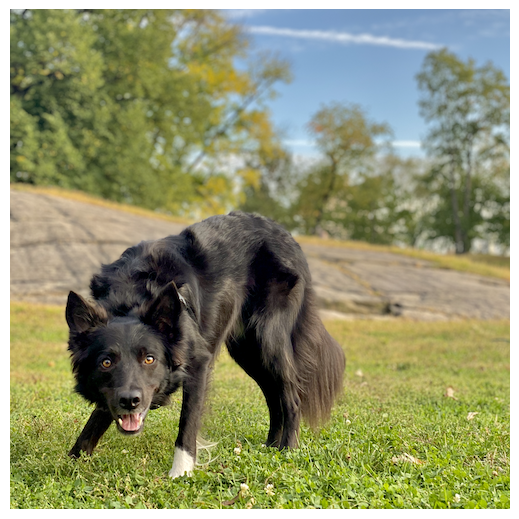

In [97]:
sns.dogplot()